In [1]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

In [3]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Training set score: 0.986800
Test set score: 0.970000
here
[[1.18507637e-11 4.14636097e-14 5.46038616e-09 ... 6.69995528e-11
  1.64782191e-11 1.54564700e-11]
 [9.98620642e-01 8.41540249e-09 1.25791368e-03 ... 1.19002786e-04
  6.20754817e-11 2.31239731e-06]
 [3.71140269e-07 1.30230110e-04 1.96566592e-02 ... 4.96844293e-02
  7.46772482e-06 2.46895548e-03]
 ...
 [2.14025153e-12 5.33333674e-11 3.14965453e-14 ... 3.12691028e-11
  8.33006117e-08 1.68312521e-05]
 [1.83080844e-05 4.54554510e-06 8.26129652e-04 ... 2.77154551e-06
  1.15324481e-06 1.66492966e-09]
 [1.92532730e-06 1.70333415e-07 7.07110052e-07 ... 8.34339444e-05
  9.99828049e-01 4.70932567e-05]]


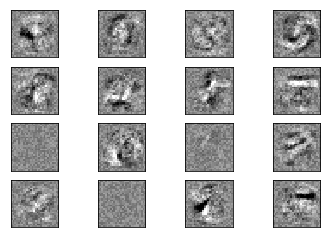

In [4]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

print("here")
print(mlp.predict_proba(X_train))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()